<a href="https://colab.research.google.com/github/ramdeveloper1985/datascience/blob/master/CropIn_Challenge_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
##### We need the imutils library which is not default in google colab
!pip install imutils

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
import imutils
from imutils import paths
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [0]:
import matplotlib.pyplot as plt #### Basic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots

In [0]:
!rm -r data

In [17]:
# Checking the current working directory path
import os
cwd = os.getcwd()
print(cwd)

/content


In [0]:
PATH = cwd + '/data/'

In [0]:
import os
if not os.path.exists(PATH):
    os.makedirs(PATH)

In [53]:
#### Extract a list of image file names from the directory to visualise

#### run the list files command and get the top results and save it into a list object
files = !ls {PATH} | head 
print(files)

['Brocolli_1.jpeg', 'Brocolli_2.jpeg', 'Brocolli_3.jpeg', 'Brocolli_4.jpeg', 'Brocolli_5.jpeg', 'Brocolli_6.jpeg', 'Brocolli_7.jpeg', 'Capsicum_10.jpeg', 'Capsicum_1.jpeg', 'Capsicum_2.jpeg']


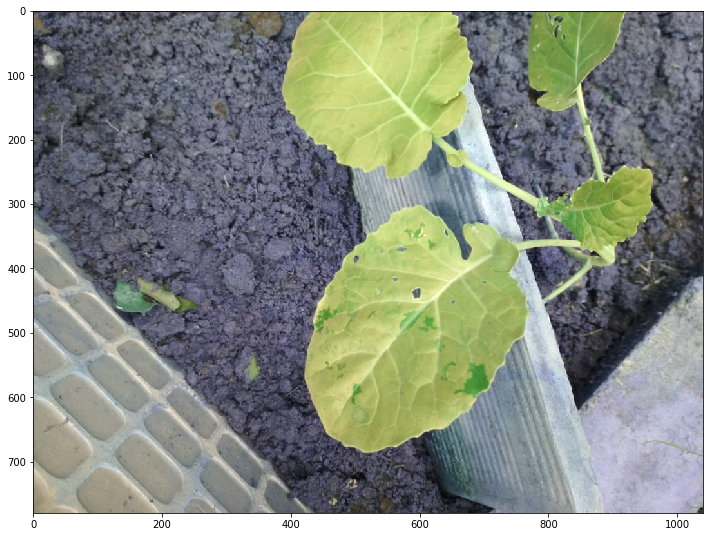

In [54]:
#### Open and Visualise a Single Image
img_path = PATH + files[0]
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [102]:
#### the imutils paths.list_images function will return the full path of all images
#### in the current directory and its sub-directories
imagePaths = list(paths.list_images(PATH))
print(len(imagePaths))
imagePaths.sort() 
for imgPath in imagePaths: 
    print(imgPath) 

86
/content/data/Brocolli_1.jpeg
/content/data/Brocolli_2.jpeg
/content/data/Brocolli_3.jpeg
/content/data/Brocolli_4.jpeg
/content/data/Brocolli_5.jpeg
/content/data/Brocolli_6.jpeg
/content/data/Brocolli_7.jpeg
/content/data/Capsicum_1.jpeg
/content/data/Capsicum_10.jpeg
/content/data/Capsicum_2.jpeg
/content/data/Capsicum_3.jpeg
/content/data/Capsicum_4.jpeg
/content/data/Capsicum_5.jpeg
/content/data/Capsicum_6.jpeg
/content/data/Capsicum_7.jpeg
/content/data/Capsicum_8.jpeg
/content/data/Capsicum_9.jpeg
/content/data/Carrot_1.jpeg
/content/data/Carrot_2.jpeg
/content/data/Carrot_4.jpeg
/content/data/Carrot_5.jpeg
/content/data/Carrot_6.jpeg
/content/data/Carrot_7.jpeg
/content/data/Chilli_1.jpeg
/content/data/Chilli_2.jpeg
/content/data/Chilli_3.jpeg
/content/data/Chilli_4.jpeg
/content/data/Cucumber_1.jpeg
/content/data/Cucumber_10.jpeg
/content/data/Cucumber_11.jpeg
/content/data/Cucumber_2.jpeg
/content/data/Cucumber_3.jpeg
/content/data/Cucumber_4.jpeg
/content/data/Cucumber_5

In [103]:

##### figure out the label of the image from its path
labels=[]
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    #### Extract the label of the image from the image path
    label = imagePath.split(os.path.sep)[-1].split(".")[0].split("_")[0]
    labels.append(label)
labels[0]

'Brocolli'

In [104]:
##### Print the labels of different objects to see they are different
print(labels[0])
print(labels[19])
print(len(labels))

Brocolli
Carrot
86


In [105]:
# insert the list to the set 
list_set = set(labels) 
# convert the set to the list 
unique_list = (list(list_set)) 
unique_list.sort() 
for x in unique_list: 
    print(x)
print('Number of unique classes ' + str(len(unique_list)))

Brocolli
Capsicum
Carrot
Chilli
Cucumber
Okra
Raddish
Redrad
Spinach
Tomato
Zebera
Number of unique classes 11


In [106]:
import collections
ctr = collections.Counter(labels)
print("Frequency of the elements in the List : ",ctr)

Frequency of the elements in the List :  Counter({'Okra': 20, 'Cucumber': 11, 'Capsicum': 10, 'Spinach': 10, 'Tomato': 9, 'Brocolli': 7, 'Carrot': 6, 'Chilli': 4, 'Raddish': 4, 'Redrad': 4, 'Zebera': 1})


<BarContainer object of 11 artists>

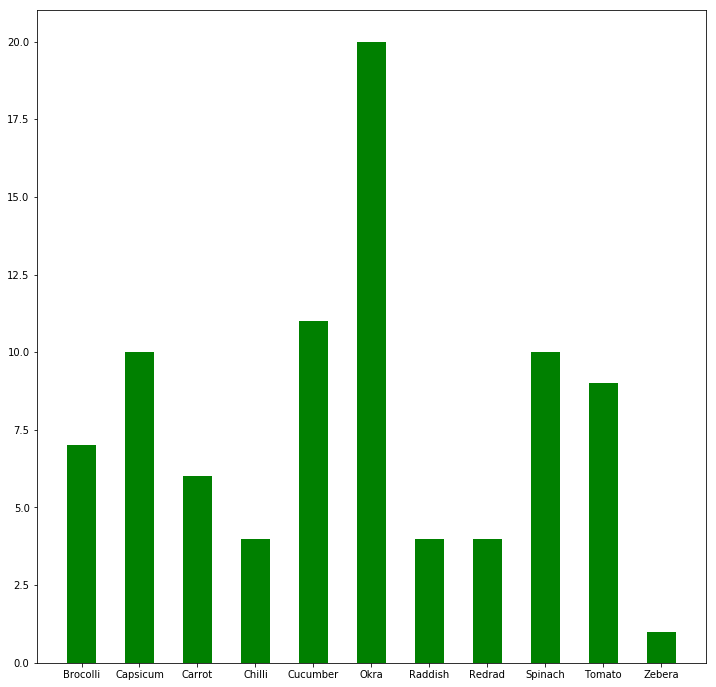

In [71]:
plt.bar(ctr.keys(), ctr.values(), 0.5, color='g')

In [107]:
print('Before removing count '+ str(len(imagePaths)))
imagePaths=[ x for x in imagePaths if "Zebera" not in x ]
print('After removing count '+ str(len(imagePaths)))

Before removing count 86
After removing count 85


Number of unique classes 10


<BarContainer object of 10 artists>

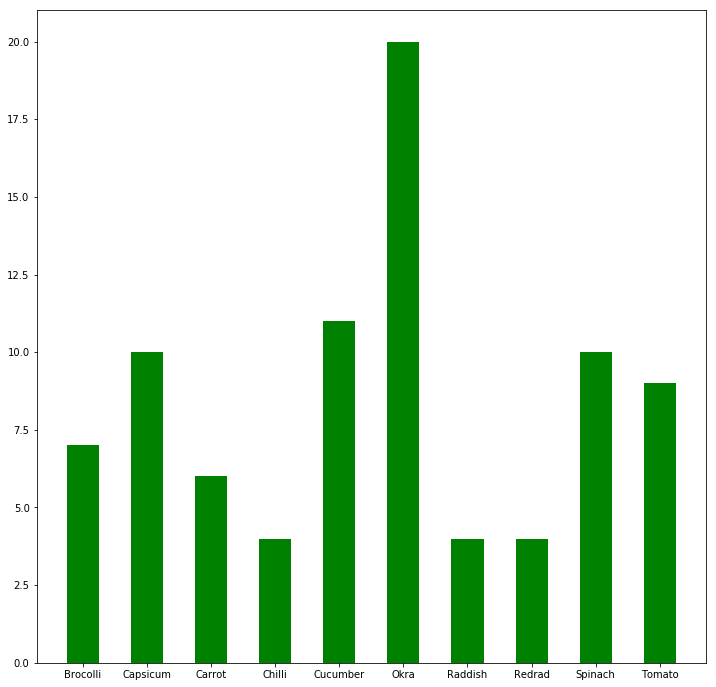

In [155]:
##### figure out the label of the image from its path
labels=[]
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    #### Extract the label of the image from the image path
    label = imagePath.split(os.path.sep)[-1].split(".")[0].split("_")[0]
    labels.append(label)

# insert the list to the set 
list_set = set(labels) 
# convert the set to the list 
unique_list = list(list_set)
unique_list_count = len(unique_list)

print('Number of unique classes ' + str(unique_list_count))

ctr = collections.Counter(labels)
plt.bar(ctr.keys(), ctr.values(), 0.5, color='g')

In [156]:
##### figure out the label of the image from its path
labels=[]
data=[]

for (i, imagePath) in enumerate(imagePaths):
    ##print(imagePath)
    image = cv2.imread(imagePath)
    #print(imagePath)
    #### Extract the label of the image from the image path
    label = imagePath.split(os.path.sep)[-1].split(".")[0].split("_")[0]
    #### Append the features and labels to our list variables
    #print(image)
    features = cv2.resize(image, (32, 32))
    data.append(features)
    labels.append(label)

print('features count ' + str(len(data)))
print('labels count ' + str(len(labels)))


features count 85
labels count 85


In [157]:
#### Encode the labels to Numerical Values
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])

#### One Hot Encode the Numerical Values
labels = np_utils.to_categorical(labels, unique_list_count)
print(labels[0])

#### Scale the input pixel values
data = np.array(data) / 255.0

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#### Create a train test split
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [0]:
# input image dimensions
input_shape = data[0].shape
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(unique_list_count, activation='softmax'))

In [0]:
##### Intialise a Stochastic Gradient Descent Optimiser Object
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [170]:
#### Train the Model
pred=model.fit(trainData, trainLabels, epochs=50, batch_size=25)

Epoch 1/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0169 - acc: 1.0000
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0164 - acc: 1.0000
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0161 - acc: 1.0000
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0159 - acc: 1.0000
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0160 - acc: 1.0000
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0159 - acc: 1.0000
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0157 - acc: 1.0000
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0157 - acc: 1.0000
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0154 - acc: 1.0000
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0155 - acc: 1.0000
Epoch 11/50
63/63 [==============================] - 0s 3ms/step - lo

In [171]:
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=64, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

22/22 [==============================] - 0s 1ms/step
[INFO] loss=0.1769, accuracy: 92.7273%


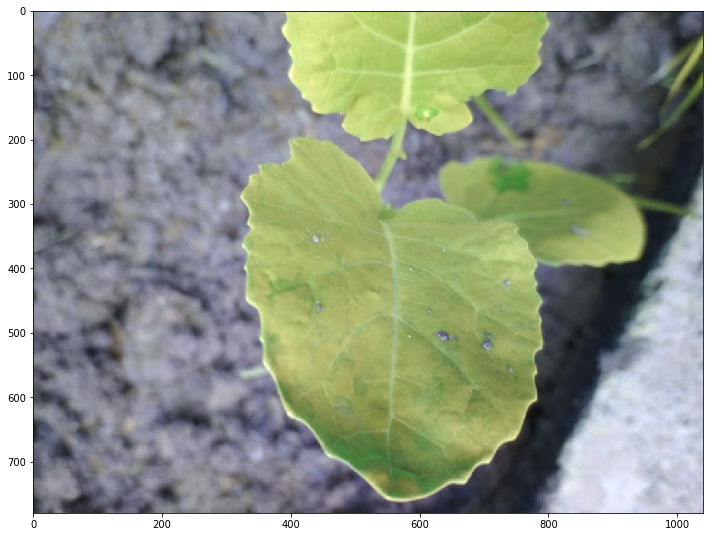

In [172]:
##### To Predict on a New Unseen Image
##### Step1 Laod an unseen image
image = cv2.imread("data/Brocolli_4.jpeg")
plt.imshow(image)
plt.show()

In [173]:
##### Flatten the test image
test_feature = cv2.resize(image, (32, 32))
print(test_feature.shape)

##### Reshape the test image shape to match the network thats expecting a set of images
test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],test_feature.shape[2])
print(test_feature.shape)

(32, 32, 3)
(1, 32, 32, 3)


In [174]:
##### Preprocess the test image
test_feature = cv2.resize(image, (32, 32))

print(test_feature.shape)
print(test_feature.shape)

test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],test_feature.shape[2])

prediction = model.predict_classes(test_feature)
print(prediction)
print(le.inverse_transform(prediction))

(32, 32, 3)
(32, 32, 3)
[0]
['Brocolli']
